# English Alphabet Capital Classifier

Using Hebb NN

In [1]:
%matplotlib inline
from __future__ import print_function
import sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2

## Data

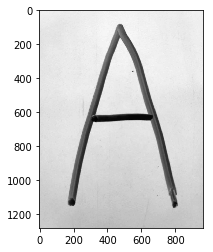

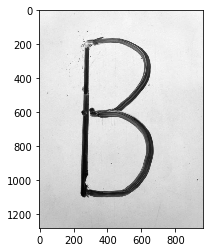

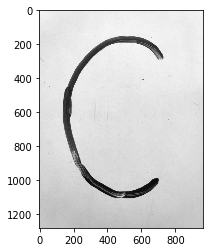

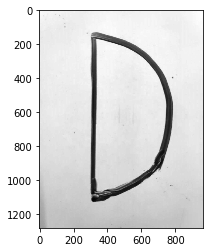

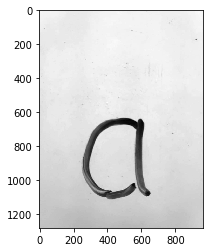

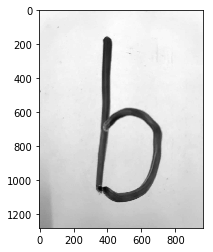

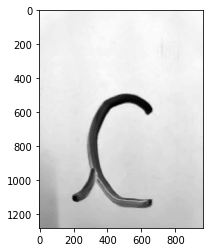

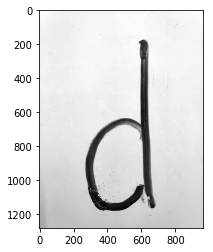

In [12]:
images = []
image = cv2.imread(r'D:\Class assignment\NN Images\1.jpeg', cv2.IMREAD_GRAYSCALE)
for i in range(1, 9):
    image = cv2.imread(r'D:\Class assignment\NN Images\{}.jpeg'.format(i), cv2.IMREAD_GRAYSCALE)
    images.append(image)
    plt.imshow(image, cmap='gray')
    plt.show()

#### ImageToMatrix helper function
Converts image to 100 x 70 matrix with bipolar values <br>
with values classified on the basis of threshold value (100)

In [20]:
def image_to_matrix(image):
    # resize image to 100 X 70 pixel size
    res = cv2.resize(image, dsize=(70, 100), interpolation= cv2.INTER_CUBIC)
    # height and width of resized image
    h, w = res.shape
    # converted pixels to bipolar values based on threshold
    bn = np.where(res < 100, 1, -1).reshape(1, (h*w))[0]
    # returning vector
    return bn

x = np.zeros((8, 7000), dtype=int)

for i in range(8):
    x[i] = image_to_matrix(images[i])
    
print(x.shape)

(8, 7000)


In [4]:
target = np.full(8, -1, dtype=int)
target[:4] = 1

print(target)

[ 1  1  1  1 -1 -1 -1 -1]


In [5]:
weights = np.zeros(7000, dtype=float)
weights

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

#### Accuracy helper function
Check if prediction values are equal to target <br>
Returns values in between 0 to 1

In [6]:
def accuracy(inputs, targets, weights):
    num_correct = 0.0
    preds = []
    for i in range(len(inputs)):
        # get prediction classification
        pred = predict(inputs[i], weights)
        preds.append(pred)
        # check if prediction is accurate
        if pred==targets[i]: num_correct+=1.0
    
    print("Predictions: ", preds)
    
    # return overall prediction accuracy
    return num_correct/float(len(inputs))

#### Predict helper function
First calculates Y(in) using weights and input values <br>
Returns y using f(yin)

In [7]:
def predict(inputs, weights):
    threshold = 0.0
    total_activation = 0
    for input, weight in zip(inputs, weights):
        total_activation += input * weight
    return 1.0 if total_activation >= threshold else -1.0

### Training
#### Using Hebb's Rule
W(new) = W(old) + alpha x input(i) x target

In [8]:
def train_weights(inputs, weights, target, nb_epochs=10, l_rate=1.0):
    for epoch in range(nb_epochs):
        curr_acc = accuracy(inputs, target, weights)
        print("Accuracy : ", curr_acc)
        
        if curr_acc==1.0: break
        
        for i in range(len(inputs)):
            prediction = predict(inputs[i], weights)
        
            for j in range(len(weights)):
                weights[j] += l_rate * inputs[i][j] * target[i]
                
    print("Final weights : ", weights)
    return weights

In [9]:
train_weights(inputs=x, weights=weights, target=target)

Predictions:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy :  0.5
Predictions:  [1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0]
Accuracy :  1.0
Final weights :  [ 0.  0.  0. ...,  0.  0.  0.]


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

### Testing
on training data only

In [23]:
def test(test_input, prediction):
    res = 0
    for i in range(len(test_input)):
        res += test_input[i]*prediction[i]
    return 1 if res > 0 else -1

test_result = []
for i in range(8):
    test_result.append(test(x[i], weights))
test_result

[1, 1, 1, 1, -1, -1, -1, -1]

Same as target